<h1 style="color:#3498db">IMDb Top 1000 Data Analysis and Regression</h1>

<h2 style="color:#e74c3c">Introduction</h2>
This notebook aims to perform analysis and build a regression model on the IMDb Top 1000 dataset.

## <span style="color:#9b59b6">Step 1: Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

## <span style="color:#9b59b6">Step 2: Uploading the Data Set and Getting General Information</span>

In [2]:
data=pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
data.shape

(1000, 16)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.0,7.94930,0.275491,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,273692.91100,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0


In [6]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## <span style="color:#9b59b6">Step 3: Filling in Missing Data</span>

In [7]:
data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## <span style="color:#9b59b6">Step 4: Examining Data Relationships</span>

In [8]:
data.corr()['IMDB_Rating'].sort_values()
data.groupby('IMDB_Rating').mean()[['Meta_score','No_of_Votes']]

C:\Users\gbara\AppData\Local\Temp\ipykernel_29328\2987220789.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['IMDB_Rating'].sort_values()
C:\Users\gbara\AppData\Local\Temp\ipykernel_29328\2987220789.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('IMDB_Rating').mean()[['Meta_score','No_of_Votes']]


,Meta_score,No_of_Votes
IMDB_Rating,,
7.6,71.739143,2.024600e+05
7.7,75.481719,1.890612e+05
7.8,76.089887,1.822442e+05
7.9,81.174948,1.947047e+05
8.0,78.824941,2.335436e+05
8.1,80.487096,2.469729e+05
8.2,80.243108,2.850520e+05
8.3,81.493530,4.374499e+05
8.4,81.023074,4.757802e+05


## <span style="color:#9b59b6">Step 5: Data Visualization</span>

<Axes: xlabel='IMDB_Rating', ylabel='Count'>

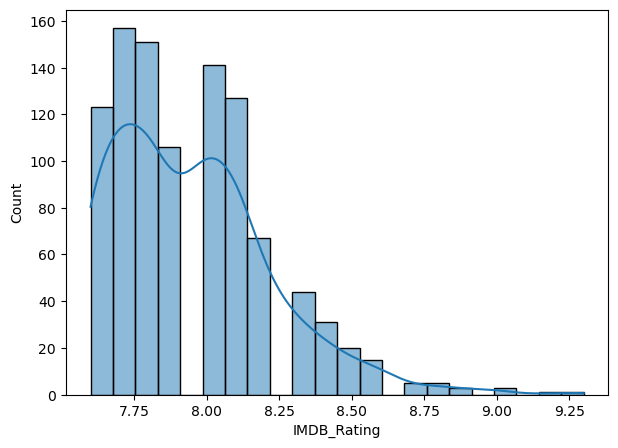

In [9]:
plt.figure(figsize=(7,5))
sns.histplot(data['IMDB_Rating'],kde=True)

<Axes: xlabel='No_of_Votes', ylabel='IMDB_Rating'>

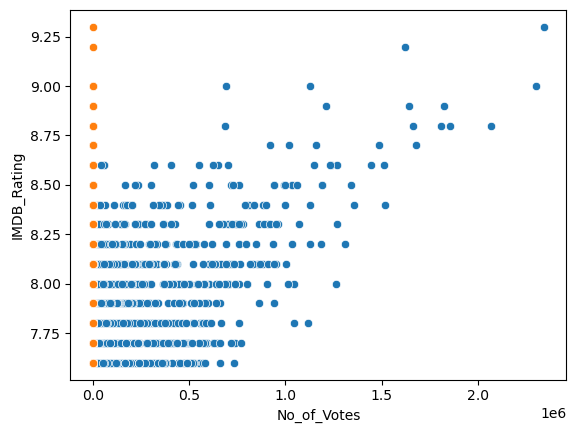

In [10]:
sns.scatterplot(x='No_of_Votes',y='IMDB_Rating',data=data)
sns.scatterplot(x='Meta_score',y='IMDB_Rating',data=data)

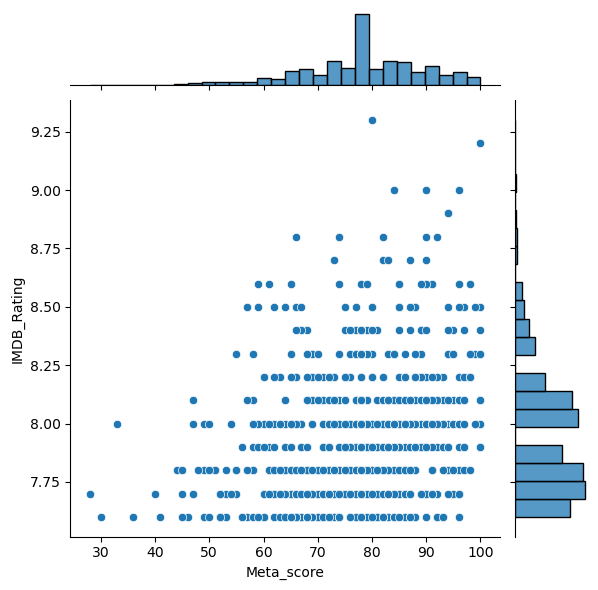

In [11]:
sns.jointplot(x='Meta_score', y='IMDB_Rating', data=data, kind='scatter')

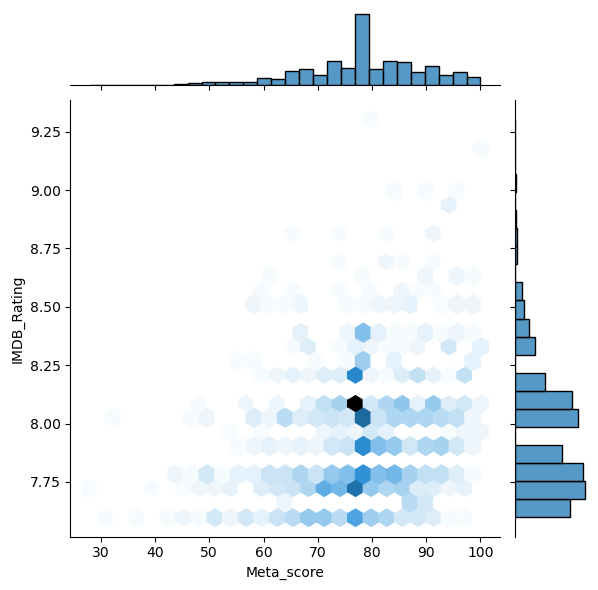

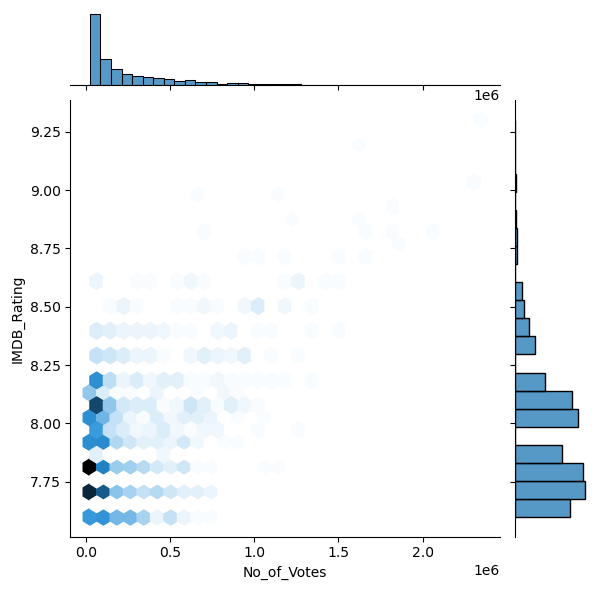

In [12]:
sns.jointplot(x='Meta_score', y='IMDB_Rating', data=data, kind='hex')
sns.jointplot(x='No_of_Votes', y='IMDB_Rating', data=data, kind='hex')

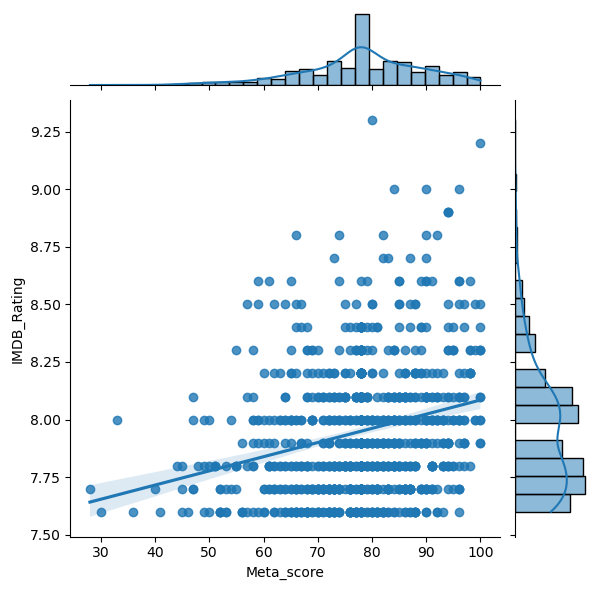

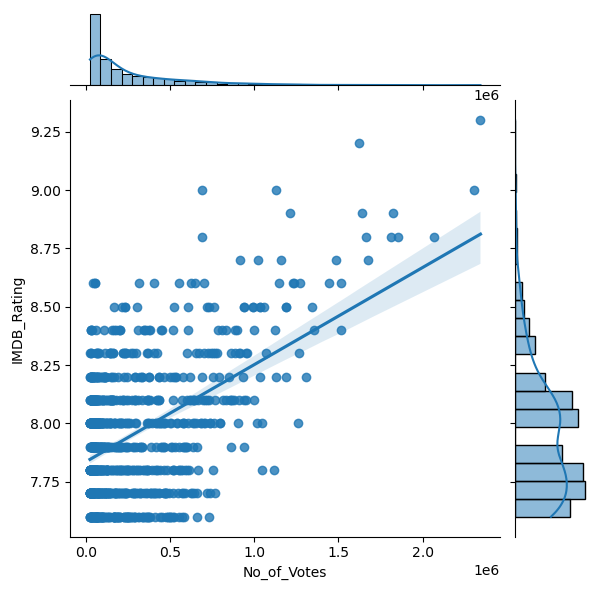

In [13]:
sns.jointplot(x='Meta_score', y='IMDB_Rating', data=data, kind='reg')
sns.jointplot(x='No_of_Votes', y='IMDB_Rating', data=data, kind='reg')

## <span style="color:#9b59b6">Step 6: Data Preparation and Preprocessing</span>

In [14]:
yuksekveri = data['Meta_score'].value_counts().index[0]

# çeyrekler arası mesafeyi hesapla
q1, q3 = np.percentile(data['No_of_Votes'], [25, 75])
iqr = q3 - q1

# aykırı değerleri bul
outliers = data[data['No_of_Votes'] < q1 - 1.5 * iqr]
outliers = data[data['No_of_Votes'] > q3 + 1.5 * iqr]


# en yüksek değeri başka bir dataframe'e at
yeniData = data[data['Meta_score'] != yuksekveri]
yeniData=outliers

In [15]:
yeniData=pd.DataFrame(yeniData[['IMDB_Rating','No_of_Votes','Meta_score']])

## <span style="color:#9b59b6">Step 7: Split data for testing and training</span>

In [16]:
y=yeniData['IMDB_Rating'].values
x=yeniData.drop('IMDB_Rating',axis=1).values

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)

## <span style="color:#9b59b6">Step 8: Scaling Data</span>

In [18]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

## <span style="color:#9b59b6">Step 9: Creating and Training an Artificial Neural Network Model</span>

In [19]:
model=Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu'))

model.add(Dense(1))
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))

In [20]:
earlyStopping=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [21]:
model.fit(x=x_train,y=y_train,epochs=300,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/300
2/2 [==============================] - 1s 134ms/step - loss: 71.0305 - val_loss: 66.1107
Epoch 2/300
2/2 [==============================] - 0s 24ms/step - loss: 68.7143 - val_loss: 63.4530
Epoch 3/300
2/2 [==============================] - 0s 23ms/step - loss: 65.3461 - val_loss: 60.3882
Epoch 4/300
2/2 [==============================] - 0s 23ms/step - loss: 60.8322 - val_loss: 56.7494
Epoch 5/300
2/2 [==============================] - 0s 25ms/step - loss: 55.3150 - val_loss: 52.3131
Epoch 6/300
2/2 [==============================] - 0s 23ms/step - loss: 51.0718 - val_loss: 46.9325
Epoch 7/300
2/2 [==============================] - 0s 23ms/step - loss: 46.2181 - val_loss: 40.7167
Epoch 8/300
2/2 [==============================] - 0s 21ms/step - loss: 37.7206 - val_loss: 33.7727
Epoch 9/300
2/2 [==============================] - 0s 24ms/step - loss: 32.1488 - val_loss: 26.3669
Epoch 10/300
2/2 [==============================] - 0s 23ms/step - loss: 27.9939 - val_loss: 18.962

2/2 [==============================] - 0s 23ms/step - loss: 1.4068 - val_loss: 0.2312
Epoch 84/300
2/2 [==============================] - 0s 23ms/step - loss: 1.4938 - val_loss: 0.2546
Epoch 85/300
2/2 [==============================] - 0s 23ms/step - loss: 1.8570 - val_loss: 0.3078
Epoch 86/300
2/2 [==============================] - 0s 23ms/step - loss: 1.9630 - val_loss: 0.3629
Epoch 87/300
2/2 [==============================] - 0s 22ms/step - loss: 2.2473 - val_loss: 0.3684
Epoch 88/300
2/2 [==============================] - 0s 21ms/step - loss: 2.0671 - val_loss: 0.3349
Epoch 89/300
2/2 [==============================] - 0s 23ms/step - loss: 0.9579 - val_loss: 0.3383
Epoch 90/300
2/2 [==============================] - 0s 22ms/step - loss: 2.0060 - val_loss: 0.3335
Epoch 91/300
2/2 [==============================] - 0s 23ms/step - loss: 1.6093 - val_loss: 0.2895
Epoch 92/300
2/2 [==============================] - 0s 22ms/step - loss: 2.1570 - val_loss: 0.1913
Epoch 93/300
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.3327 - val_loss: 0.0879
Epoch 166/300
2/2 [==============================] - 0s 26ms/step - loss: 0.2374 - val_loss: 0.0868
Epoch 167/300
2/2 [==============================] - 0s 24ms/step - loss: 0.2415 - val_loss: 0.0857
Epoch 168/300
2/2 [==============================] - 0s 24ms/step - loss: 0.2255 - val_loss: 0.0876
Epoch 169/300
2/2 [==============================] - 0s 29ms/step - loss: 0.3045 - val_loss: 0.0901
Epoch 170/300
2/2 [==============================] - 0s 24ms/step - loss: 0.2748 - val_loss: 0.0893
Epoch 171/300
2/2 [==============================] - 0s 22ms/step - loss: 0.2283 - val_loss: 0.0874
Epoch 171: early stopping


## <span style="color:#9b59b6">Step 10: Evaluation of the Model</span>

<Axes: >

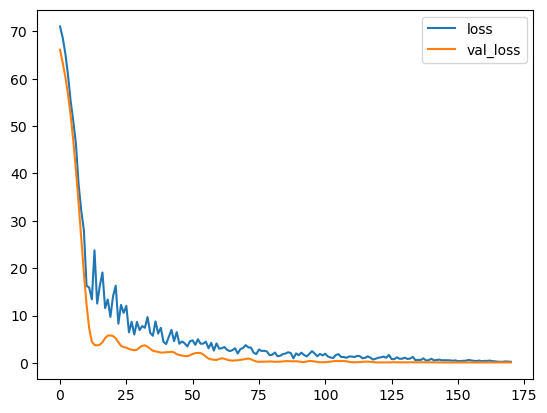

In [22]:
modelKaybi=pd.DataFrame(model.history.history)
modelKaybi.plot()

## <span style="color:#9b59b6">Step 11: Interpretation of Results</span>

In [28]:
mean_absolute_error(y_test,tahminDizi)

0.24481031998344102

In [29]:
df = pd.DataFrame({
    'Tahminler': tahminDizi.flatten(),
    'Gerçek Değerler': y_test.flatten()
})

df.head(10)

,Tahminler,Gerçek Değerler
0,8.143988,8.6
1,8.373017,8.4
2,8.225445,8.3
3,8.171155,7.9
4,8.250166,8.5
5,8.084995,8.3
6,8.261133,7.8
7,8.132025,8.1
8,8.186584,8.3
9,8.180988,8.1
